# Report Generation

The goal is to generate reports per the following specifications:
- Generate a Summary of what Models are compared, cohort sizes, and label distributions.
- Alerts that identify Models not built
- How long different Triage experiment steps took
- Settings, such as timechop visualizations or temporal configuration
- Feature descriptions, alerts, and matrices
- List of Models

And other issues we identify in the future.

### Setup

Because the `dsapp-social-services-migrated` bucket seems to have access denied to visitors, I will be using local triage data, emulated from the colab experiment.

In [1]:
from model_analyzer import ModelAnalyzer
from report_generator import PostmodelingReport

In [2]:
import pandas as pd
from sqlalchemy import create_engine
from sqlalchemy.engine.url import URL

In [3]:
%matplotlib inline 

In [4]:
# The connection to the db which has the triage experiment information
db_url = URL(
            'postgres',
            host='localhost',
            username='postgres',
            database='donors_choose',
            password='postgres',
            port=5432,
        )

db_engine = create_engine(db_url)

In [5]:
model_groups=[1, 2, 3, 4, 5, 6, 7]
experiment_hash = ['2bae5ac385120df2ce2d76d38a4c1455']

In [6]:
rep = PostmodelingReport(db_engine, model_groups=model_groups, experiment_hashes=experiment_hash)

### Summary

Let's find out what models are compared, the cohorts, and label base rate

In [13]:
pd.DataFrame(rep.display_model_groups())

,model_group_id,model_type,hyperparameters
0,1,sklearn.ensemble.RandomForestClassifier,"{'max_depth': 50, 'n_estimators': 100, 'min_sa..."
1,2,sklearn.ensemble.RandomForestClassifier,"{'max_depth': 50, 'n_estimators': 100, 'min_sa..."
2,3,sklearn.ensemble.RandomForestClassifier,"{'max_depth': 75, 'n_estimators': 100, 'min_sa..."
3,4,sklearn.ensemble.RandomForestClassifier,"{'max_depth': 75, 'n_estimators': 100, 'min_sa..."
4,5,sklearn.tree.DecisionTreeClassifier,"{'max_depth': 3, 'max_features': None, 'min_sa..."
5,6,triage.component.catwalk.estimators.classifier...,"{'C': 0.1, 'penalty': 'l1'}"
6,7,triage.component.catwalk.baselines.rankers.Bas...,{'rules': [{'feature': 'project_features_entit...


In [18]:
pd.DataFrame(rep.cohort_summary())

,train_end_time,cohort_size,num_positive_labels,label_base_rate
0,2012-04-01,388,153,0.394330
1,2012-08-01,1124,406,0.361210
2,2012-12-01,635,267,0.420472


### Alerts

In [9]:
pd.DataFrame(rep.all_issues())

,experiment_id,status,models_made,models_skipped,models_errored,error_message
0,2e5f696717e6f4cc58fedfe3e8daa6d3,failed,0,0,0,\nSection: temporal_config -\nTimechop could n...
1,36c50ab7fcef322cbe0c333c26ba639a,not finished,0,0,0,None


In [10]:
pd.DataFrame(rep.get_issues())

""


### Timechop Data

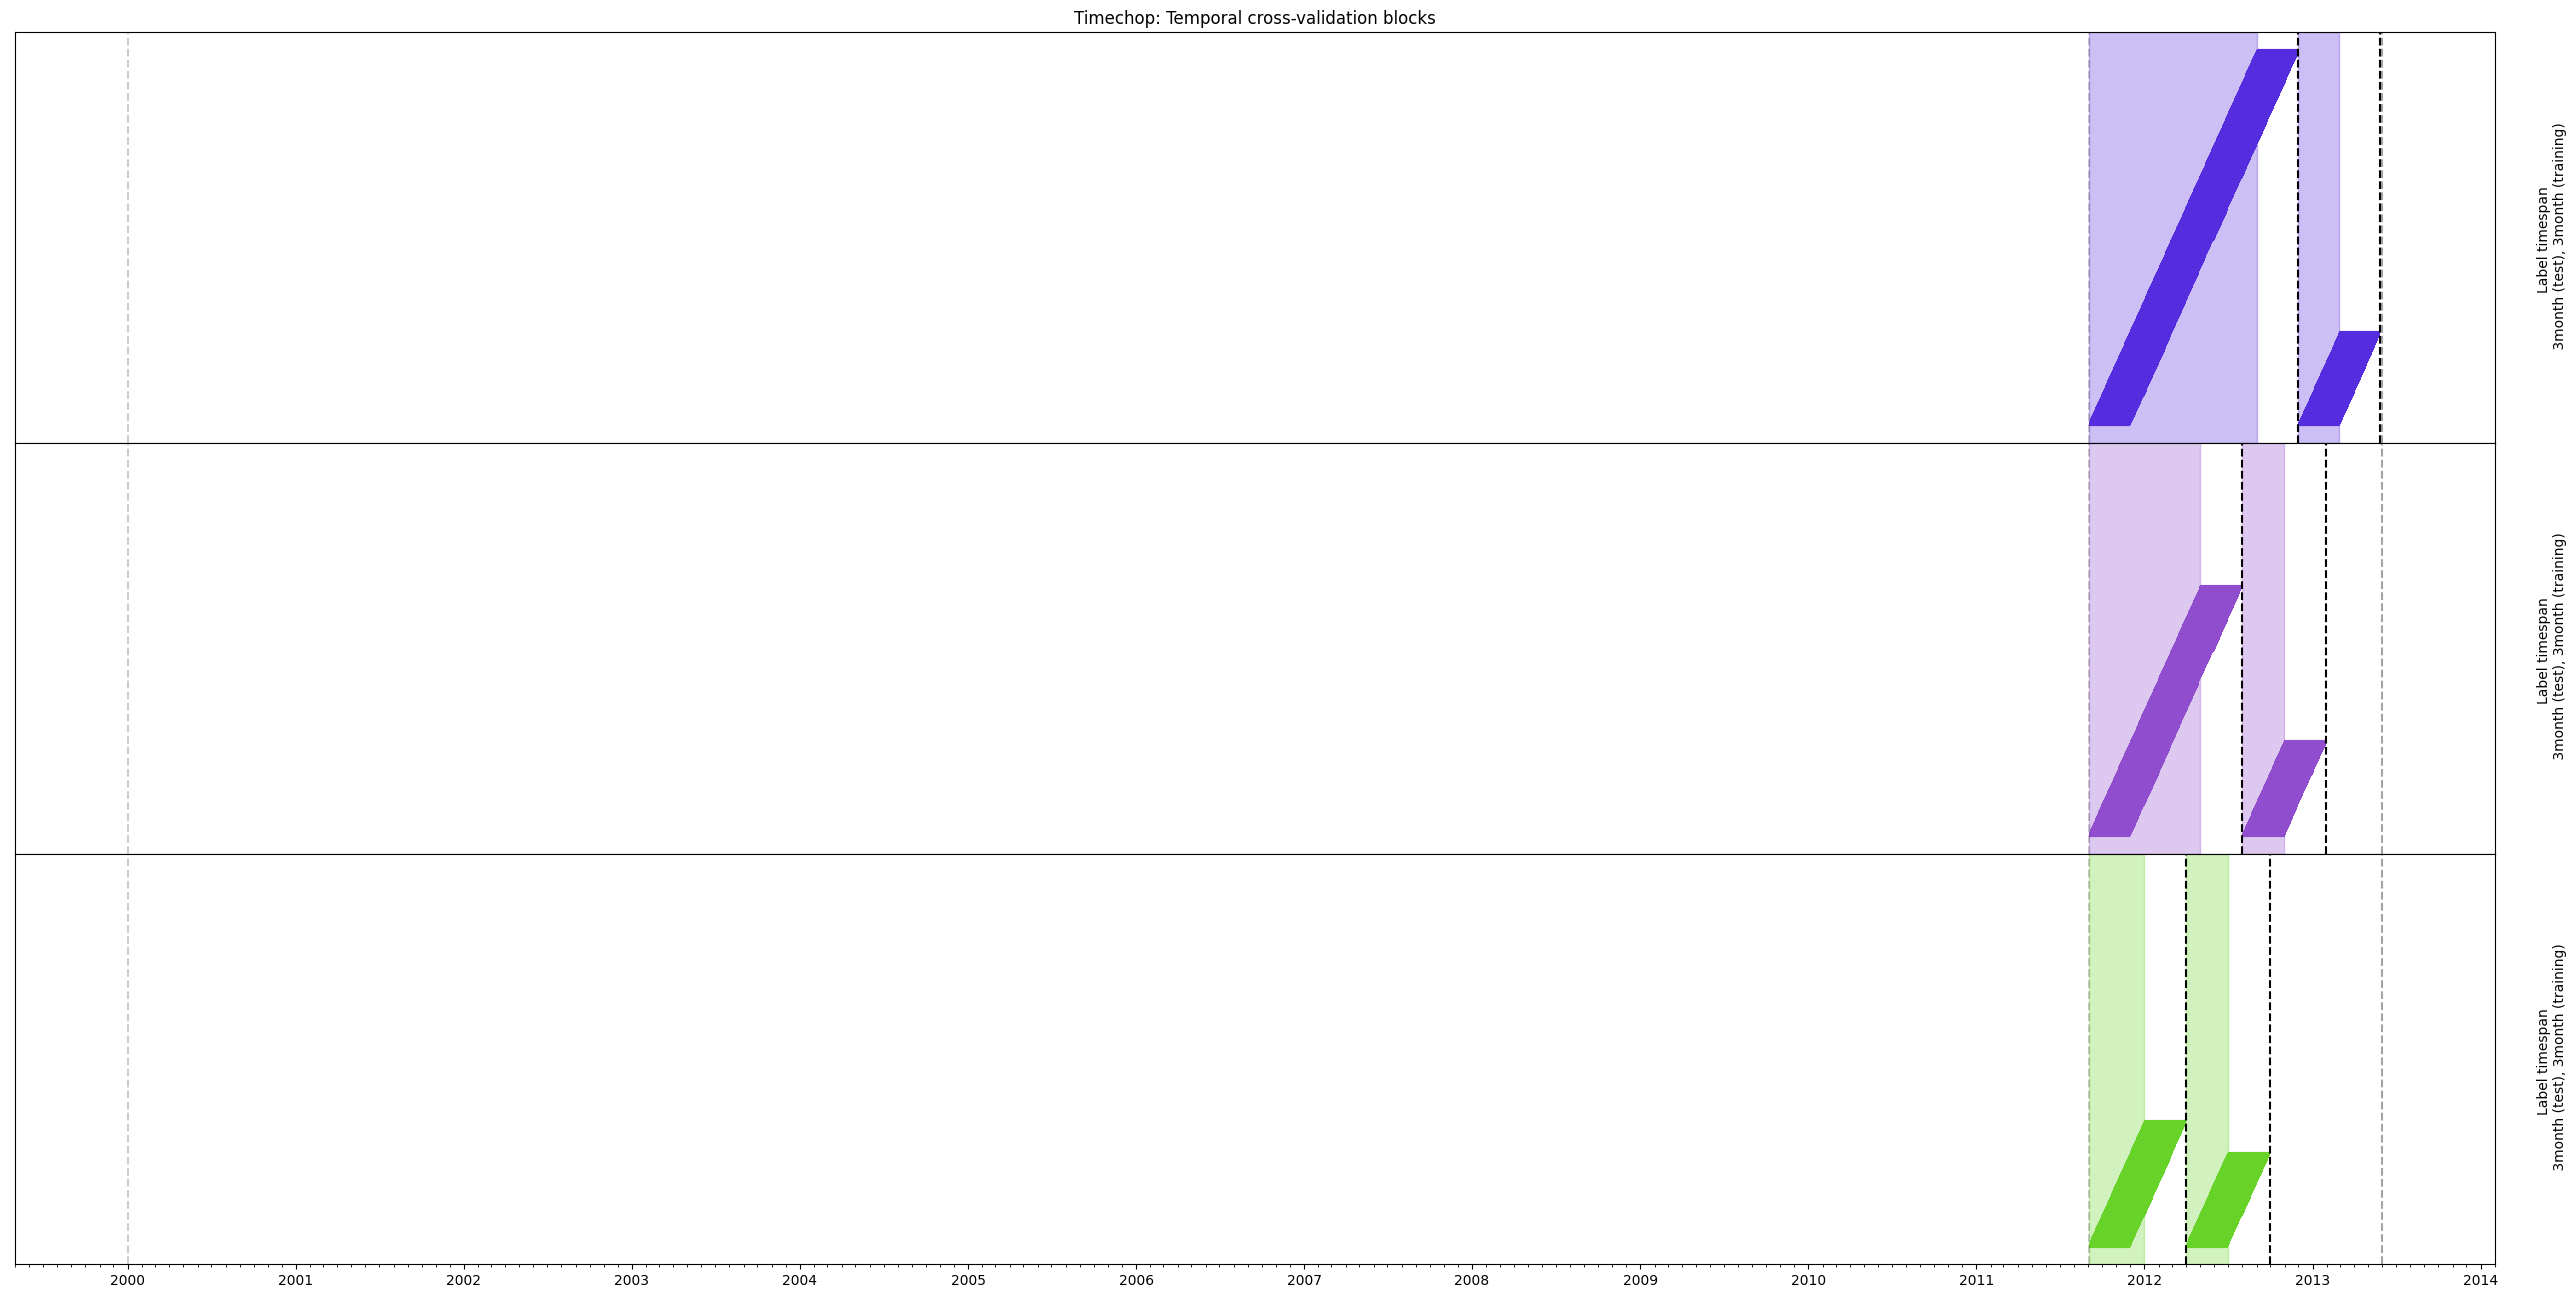

In [11]:
x = rep.plot_timechops()